In [1]:
import numpy as np
import torch
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np 
import math 
from skimage.io import imread, imshow
import os
import random
#import cv2

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


**Carga de datos local**

In [3]:
path_Covid = r'C:\Users\Cracker31\Desktop\JOSE\maestria\UTEC\ciclo2\ai\proyecto3\archive\COVID-19_Radiography_Dataset\COVID' 
path_Normal = r'C:\Users\Cracker31\Desktop\JOSE\maestria\UTEC\ciclo2\ai\proyecto3\archive\COVID-19_Radiography_Dataset\Normal'
path_Lung_Opacity = r'C:\Users\Cracker31\Desktop\JOSE\maestria\UTEC\ciclo2\ai\proyecto3\archive\COVID-19_Radiography_Dataset\Lung_Opacity'
path_Viral_Pneumonia = r'C:\Users\Cracker31\Desktop\JOSE\maestria\UTEC\ciclo2\ai\proyecto3\archive\COVID-19_Radiography_Dataset\Viral Pneumonia'

In [4]:
#### Funcion para leer imagenes dentro de una carpeta
width = 299
height = 299
#files = 3000
def imageReading (path,files):
    folderFilesids = os.listdir(path)
    filesRandom = random.sample(folderFilesids, files)
    #folderFilesids = os.listdir(path)
    images = np.zeros((files, height, width))
    for count, n in enumerate(filesRandom):
        if(count == files):
          break
        else:
          path1 = path + '\\' + n
          originalImage = imread(path1)
          if (len(originalImage.shape)==2):
              originalImage = imread(path1)[:,:]
          if (len(originalImage.shape)==3):
              originalImage = imread(path1)[:,:,0]
          #print(originalImage.shape)
          images[count] = originalImage
    imshow(images[0])
    plt.show()
    return images
"""
#### Funcion para leer imagenes dentro de una carpeta
width = 299
height = 299
def imageReading (path):
    folderFilesids = os.listdir(path)
    images = np.zeros((len(folderFilesids), height, width))
    for count, n in enumerate(folderFilesids):
        path1 = path + '\\' + n
        originalImage = imread(path1)
        if (len(originalImage.shape)==2):
            originalImage = imread(path1)[:,:]
        if (len(originalImage.shape)==3):
            originalImage = imread(path1)[:,:,0]
        #print(originalImage.shape)
        images[count] = originalImage
    imshow(images[0])
    plt.show()
    return images
"""

"\n#### Funcion para leer imagenes dentro de una carpeta\nwidth = 299\nheight = 299\ndef imageReading (path):\n    folderFilesids = os.listdir(path)\n    images = np.zeros((len(folderFilesids), height, width))\n    for count, n in enumerate(folderFilesids):\n        path1 = path + '\\' + n\n        originalImage = imread(path1)\n        if (len(originalImage.shape)==2):\n            originalImage = imread(path1)[:,:]\n        if (len(originalImage.shape)==3):\n            originalImage = imread(path1)[:,:,0]\n        #print(originalImage.shape)\n        images[count] = originalImage\n    imshow(images[0])\n    plt.show()\n    return images\n"

C:\Users\Cracker31\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


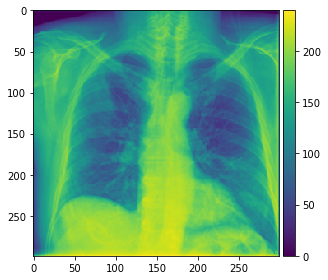

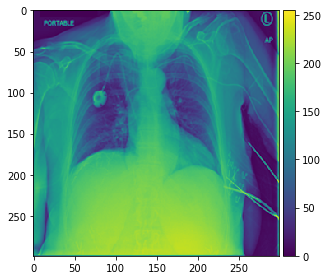

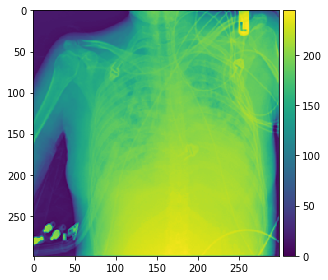

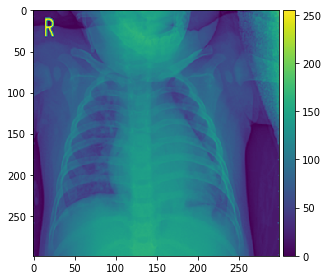

In [5]:
cantidadImg = 1000
covid = imageReading(path_Covid,cantidadImg)
normal = imageReading(path_Normal,cantidadImg)
Lung_Opacity = imageReading(path_Lung_Opacity,cantidadImg)
Viral_Pneumonia = imageReading(path_Viral_Pneumonia,cantidadImg)

In [6]:
covid.shape

(1000, 299, 299)

In [7]:
normal.shape

(1000, 299, 299)

In [8]:
Lung_Opacity.shape

(1000, 299, 299)

In [9]:
Viral_Pneumonia.shape

(1000, 299, 299)

**Agregando dimensiones para que sea leido por pytorch**

In [10]:
covid = torch.from_numpy(np.array(covid).reshape(-1,1,299,299)) ## torch se convierte nuestra data en tensor - Aumenta la dimension.
normal = torch.from_numpy(np.array(normal).reshape(-1,1,299,299)) # (-1: Cantidad de imagenes, 1: gris o color, 299 x 299: tamaño de la imagen
Lung_Opacity = torch.from_numpy(np.array(Lung_Opacity).reshape(-1,1,299,299))
Viral_Pneumonia = torch.from_numpy(np.array(Viral_Pneumonia).reshape(-1,1,299,299))

In [11]:
covid.shape

torch.Size([1000, 1, 299, 299])

In [12]:
covid[0]

tensor([[[ 49.,  49.,  49.,  ...,  54.,  59.,  60.],
         [  8.,   8.,   8.,  ...,  10.,  15.,  19.],
         [  0.,   0.,   0.,  ...,   2.,   7.,  11.],
         ...,
         [ 71.,  91.,  99.,  ..., 198., 188., 112.],
         [ 89., 111., 121.,  ..., 207., 199., 140.],
         [131., 150., 159.,  ..., 212., 207., 167.]]], dtype=torch.float64)

### Agregamos las etiquetas y transformamos a tuple

In [13]:
img_covidlist = []
for i in range(covid.shape[0]):
      img_covidlist.append((covid[i]/255.0,0.0))

img_normallist = []
for i in range(normal.shape[0]):
      img_normallist.append((normal[i]/255.0,1.0))
        
img_Lung_Opacitylist = []
for i in range(Lung_Opacity.shape[0]):
      img_Lung_Opacitylist.append((Lung_Opacity[i]/255.0,2.0))
    
img_Viral_Pneumonialist = []
for i in range(Viral_Pneumonia.shape[0]):
      img_Viral_Pneumonialist.append((Viral_Pneumonia[i]/255.0,3.0))

In [14]:
img_normallist[0]

(tensor([[[0.0510, 0.0588, 0.0510,  ..., 0.4902, 0.7412, 0.8627],
          [0.0510, 0.0588, 0.0510,  ..., 0.5059, 0.7725, 0.8980],
          [0.0471, 0.0588, 0.0471,  ..., 0.4941, 0.7647, 0.9020],
          ...,
          [0.4157, 0.6196, 0.6471,  ..., 0.1412, 0.3020, 0.5059],
          [0.4078, 0.6157, 0.6471,  ..., 0.1294, 0.2745, 0.4667],
          [0.2784, 0.4235, 0.4431,  ..., 0.0745, 0.1451, 0.2588]]],
        dtype=torch.float64),
 1.0)

### Verificar el Slicing y tamaño de las listas

In [15]:
import random
random.shuffle(img_covidlist)
covid_train = img_covidlist[0:int(len(img_covidlist)*0.7)]
covid_validation = img_covidlist[int(len(img_covidlist)*0.7):int(len(img_covidlist)*0.9)]
covid_test = img_covidlist[int(len(img_covidlist)*0.9):]

random.shuffle(img_normallist)
normal_train = img_normallist[0:int(len(img_normallist)*0.7)]
normal_validation = img_normallist[int(len(img_normallist)*0.7):int(len(img_normallist)*0.9)]
normal_test = img_normallist[int(len(img_normallist)*0.9):]

random.shuffle(img_Lung_Opacitylist)
Lung_Opacitylist_train = img_Lung_Opacitylist[0:int(len(img_Lung_Opacitylist)*0.7)]
Lung_Opacitylist_validation = img_Lung_Opacitylist[int(len(img_Lung_Opacitylist)*0.7):int(len(img_Lung_Opacitylist)*0.9)]
Lung_Opacitylist_test = img_Lung_Opacitylist[int(len(img_Lung_Opacitylist)*0.9):]

random.shuffle(img_Viral_Pneumonialist)
Viral_Pneumonialist_train = img_Viral_Pneumonialist[0:int(len(img_Viral_Pneumonialist)*0.7)]
Viral_Pneumonialist_validation = img_Viral_Pneumonialist[int(len(img_Viral_Pneumonialist)*0.7):int(len(img_Viral_Pneumonialist)*0.9)]
Viral_Pneumonialist_test = img_Viral_Pneumonialist[int(len(img_Viral_Pneumonialist)*0.9):]


### COVID 

In [16]:
print("El tamaño de la muestra COVID del training es {}, la validacion {} y del test es {}"\
      .format(len(covid_train), len(covid_validation),len(covid_test)))

El tamaño de la muestra COVID del training es 700, la validacion 200 y del test es 100


### NORMAL

In [17]:
print("El tamaño de la muestra NORMAL del training es {}, la validacion {} y del test es {}"\
      .format(len(normal_train), len(normal_validation),len(normal_test)))

El tamaño de la muestra NORMAL del training es 700, la validacion 200 y del test es 100


### LUNG OPACITY

In [18]:
print("El tamaño de la muestra LUNG_OPACITY del training es {}, la validacion {} y del test es {}"\
      .format(len(Lung_Opacitylist_train), len(Lung_Opacitylist_validation),len(Lung_Opacitylist_test)))

El tamaño de la muestra LUNG_OPACITY del training es 700, la validacion 200 y del test es 100


### VIRAL PNEUMONIALIST

In [19]:
print("El tamaño de la muestra VIRAL PNEUMONIA del training es {}, la validacion {} y del test es {}"\
      .format(len(Viral_Pneumonialist_train), len(Viral_Pneumonialist_validation),len(Viral_Pneumonialist_test)))

El tamaño de la muestra VIRAL PNEUMONIA del training es 700, la validacion 200 y del test es 100


### Unir Train de Covid y Normal y Test de Covid y Normal 

In [20]:
train_beta = covid_train + normal_train + Lung_Opacitylist_train + Viral_Pneumonialist_train
validation_beta = covid_validation + normal_validation + Lung_Opacitylist_validation + Viral_Pneumonialist_validation
test_beta = covid_test + normal_test + Lung_Opacitylist_test + Viral_Pneumonialist_test

In [21]:
batch_size = 16
train_loader = torch.utils.data.DataLoader(dataset=train_beta, batch_size=batch_size, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_beta, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_beta, batch_size=batch_size, shuffle=True)

## CNN

**Para la construccion de la red convolucional tener en cuenta:**
**Conv2d:** Se usa por que estamos trabajando con imagenes en 2 dimensiones
**in_channel:** Es la cantidad de canales, en caso sea una imagen en gris es 1, si es RGB es 3. Luego puede ir variando a medida que incrementamos el numero de capas.
**out_channels:** Es la cantidad de dimensiones de salida, es decir entra una imagen en escala de grises y salen 16 imagenes adicionales.
**Kernel_size:** El tamaño del kernel que se aplicara, siempre es una matriz cuadrada. Para nuestro caso 4x4
**Stride:** Espacio para el recorrido entre kernel y kernel.
**Pading:** Es una especio de relleno que se le aplica, este relleno puede darse en la parte superior o inferior.

**Nota:** Es importante conocer estos conceptos para saber la salida que se le entregara, se debe aplicar la siguiente formula:  


$\text{Tamaño de salida } = \frac{\text{Tamaño de la imagen } - \text{ Tamaño de kernel } + 2*\text{ Pading }}{Stride} + 1$

### Modelo 1 - Sin BatchNorm Sin Dropout

In [22]:
torch.manual_seed(22)
#hyperparameter 
num_classes = 4
learning_rate =  0.001
num_epochs = 20

class CNN1(nn.Module):
    def __init__(self, num_classes=4):
        super(CNN1, self).__init__()
        #input 299x299
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=4, stride=1, padding=2), #300 x 300
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2,padding=0)) #150 x 150
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=0),  #146
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))  #73x73
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=0),  #36
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.fc = nn.Linear(18*18*64, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        #print('aviso1')
        out = self.layer2(out)
        #print('aviso2')
        out = self.layer3(out)
        #print('aviso3')
        out = out.reshape(out.size(0), -1)
        #print('aviso4')
        out = self.fc(out)
        return out 

### Modelo 2 - con BatchNorm en cada capa Sin Dropout item 4

In [23]:
18*64

1152

In [24]:
torch.manual_seed(22)
#hyperparameter 
num_classes = 4
learning_rate =  0.001
num_epochs = 20

class CNN2(nn.Module):
    def __init__(self, num_classes=4):
        super(CNN2, self).__init__()
        #input 299x299
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=4, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2,padding=0), #150 x 150
            nn.BatchNorm2d(16)) 
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=0),  #146
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  #73x73
            nn.BatchNorm2d(32))
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=0),  #36
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(64))
        
        self.fc = nn.Linear(18*18*64, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        #print('aviso1')
        out = self.layer2(out)
        #print('aviso2')
        out = self.layer3(out)
        #print('aviso3')
        out = out.reshape(out.size(0), -1)
        #print('aviso4')
        out = self.fc(out)
        return out


### Modelo 3 - sin BatchNorm con Dropout

In [25]:
18*64

1152

In [26]:
torch.manual_seed(22)
#hyperparameter 
num_classes = 4
learning_rate =  0.001
num_epochs = 20

class CNN3(nn.Module):
    def __init__(self, num_classes=4):
        super(CNN3, self).__init__()
        #input 299x299
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=4, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2,padding=0),
            nn.Dropout(p=0.5)) #150 x 150
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=0),  #146
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.2))  #73x73
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=0),  #36
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.7))
        self.fc = nn.Linear(18*18*64, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        #print('aviso1')
        out = self.layer2(out)
        #print('aviso2')
        out = self.layer3(out)
        #print('aviso3')
        out = out.reshape(out.size(0), -1)
        #print('aviso4')
        out = self.fc(out)
        return out


### Modelo 4 - con BatchNorm con Dropout en cada capa - item 5

In [27]:
torch.manual_seed(22)
#hyperparameter 
num_classes = 4
learning_rate =  0.001
num_epochs = 20

class CNN4(nn.Module):
    def __init__(self, num_classes=4):
        super(CNN4, self).__init__()
        #input 299x299
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=4, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2,padding=0), #150 x 150
            nn.Dropout(p=0.5),
            nn.BatchNorm2d(16))            
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=0),  #146
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.2),
            nn.BatchNorm2d(32))  #73x73
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=0),  #36
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.7),
            nn.BatchNorm2d(64))
        
        self.fc = nn.Linear(18*18*64, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        #print('aviso1')
        out = self.layer2(out)
        #print('aviso2')
        out = self.layer3(out)
        #print('aviso3')
        out = out.reshape(out.size(0), -1)
        #print('aviso4')
        out = self.fc(out)
        return out


### Modelo 5 - con BatchNorm con Dropout solo primera cada item 6

In [28]:
torch.manual_seed(22)
#hyperparameter 
num_classes = 4
learning_rate =  0.001
num_epochs = 20

class CNN5(nn.Module):
    def __init__(self, num_classes=4):
        super(CNN5, self).__init__()
        #input 299x299
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=4, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2,padding=0), #150 x 150
            nn.Dropout(p=0.5),
            nn.BatchNorm2d(16))            
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=0),  #146
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))  #73x73
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=0),  #36
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.fc = nn.Linear(18*18*64, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        #print('aviso1')
        out = self.layer2(out)
        #print('aviso2')
        out = self.layer3(out)
        #print('aviso3')
        out = out.reshape(out.size(0), -1)
        #print('aviso4')
        out = self.fc(out)
        return out

### Entrenamiento de nuestros modelos

### Modelo 1 - Sin BatchNorm Sin Dropout

In [29]:
model         = CNN1(num_classes).to(device)
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(model.parameters(), lr = learning_rate)

print([e.shape for e in model.fc.parameters()])

[torch.Size([4, 20736]), torch.Size([4])]


In [30]:
def train(model, optimizer, loos_fn, num_epochs):
    loss_vals = []
    running_loss =0.0
    # train the model
    total_step = len(train_loader)  # el train loader es el motor que se encarga de sacar las imagenes del train_set

    list_loss_train= []
    list_loss_validation = []
    list_time = []
    j=0
    
    best_loss = 0
    
    # Train the model
    for epoch in range(num_epochs):
        train_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images = images.float().to(device)
            labels = labels.long().to(device)
            # forward 
            output = model(images).float()
            #Calucla el loss
            loss   = loss_fn(output, labels)
            # change the params
            # Clear the gradients of all optimized variables
            optimizer.zero_grad()
            # Backward 
            loss.backward()
            #parametros update
            optimizer.step()
            train_loss +=loss.item()
            list_time.append(j)
            j+=1

            if (i+1) % 100 == 0:
                  print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                        .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
                    
        list_loss_train.append(train_loss / len(train_loader))
        
        #validation of the model
        valid_loss =0.0   
        for i, (images, labels) in enumerate(test_loader):
            images = images.float().to(device)
            labels = labels.long().to(device)
            
            # Forward Pass
            output = model(images).float()
            # Find the Loss
            loss   = loss_fn(output, labels)
            # Calculate loss
            valid_loss +=loss.item()
        #Save loss in a List
        
        list_loss_validation.append(valid_loss / len(test_loader))
        ###Early stopping###
        if valid_loss > best_loss:
            best_loss = valid_loss
            # At this point also save a snapshot of the current model
            torch.save(model, 'my_model_best_loss.pth')
        
        print(f'Epoch {epoch+1} Training Loss: {train_loss / len(train_loader)} Validation Loss: {valid_loss / len(validation_loader)}')  
    
    print('Finished Training Trainset')
    return list_loss_train,list_loss_validation, best_loss, model

In [31]:
%%time
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=15)

Epoch [1/15], Step [100/175], Loss: 0.7760
Epoch 1 Training Loss: 0.9385423253263746 Validation Loss: 0.42159801959991455
Epoch [2/15], Step [100/175], Loss: 0.8048
Epoch 2 Training Loss: 0.7261878059591566 Validation Loss: 0.3496621650457382
Epoch [3/15], Step [100/175], Loss: 1.1173
Epoch 3 Training Loss: 0.6396667027473449 Validation Loss: 0.3385868829488754
Epoch [4/15], Step [100/175], Loss: 0.6556
Epoch 4 Training Loss: 0.5790402909687588 Validation Loss: 0.27342716097831726
Epoch [5/15], Step [100/175], Loss: 0.6600
Epoch 5 Training Loss: 0.49675194697720665 Validation Loss: 0.2592481911182404
Epoch [6/15], Step [100/175], Loss: 0.3306
Epoch 6 Training Loss: 0.4450754333393914 Validation Loss: 0.24231312334537505
Epoch [7/15], Step [100/175], Loss: 0.2391
Epoch 7 Training Loss: 0.3763877642580441 Validation Loss: 0.2667999854683876
Epoch [8/15], Step [100/175], Loss: 0.6353
Epoch 8 Training Loss: 0.3362045051796096 Validation Loss: 0.27593607127666475
Epoch [9/15], Step [100/175

In [32]:
with torch.no_grad():
    y_true = []
    y_pred = []  
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.float().to(device), labels.float().to(device)           
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        y_true.append(labels.cpu().data.numpy()) 
        y_pred.append(predicted.cpu().data.numpy())  
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'.format(len(test_beta), 100 * correct / total))

Test Accuracy of the model on the 400 test images: 79.25 %


In [33]:
from sklearn.metrics import confusion_matrix
import itertools

confusion_matrix(list(itertools.chain(*y_true)), list(itertools.chain(*y_pred)))

array([[84,  5,  9,  2],
       [10, 59, 28,  3],
       [ 9,  9, 79,  3],
       [ 3,  1,  1, 95]], dtype=int64)

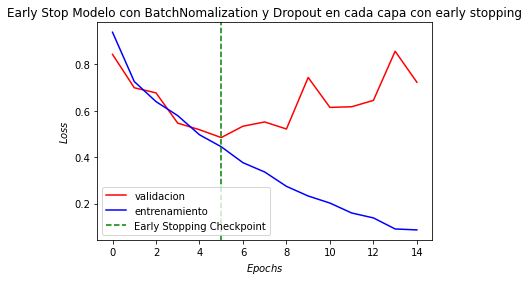

In [34]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.plot( list_loss_validation, '-r', label="validacion")
plt.plot( list_loss_train, '-b', label="entrenamiento")
# find position of lowest validation loss
minposs = list_loss_validation.index(min(list_loss_validation)) 
plt.axvline(minposs, linestyle='--', color='g',label='Early Stopping Checkpoint')

plt.ylabel('$Loss$')
plt.xlabel('$Epochs$')
plt.title('Early Stop Modelo con BatchNomalization y Dropout en cada capa con early stopping')
plt.legend()
plt.show()

### Modelo 2 - con BatchNorm en cada capa Sin Dropout item 4

In [35]:
###Definicion de hiperparametros funcion loss y optimizador
model         = CNN2(num_classes).to(device)
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(model.parameters(), lr = learning_rate)

print([e.shape for e in model.fc.parameters()])

[torch.Size([4, 20736]), torch.Size([4])]


In [36]:
%%time
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=15)

Epoch [1/15], Step [100/175], Loss: 2.8018
Epoch 1 Training Loss: 1.6597675487824848 Validation Loss: 0.6232590311765671
Epoch [2/15], Step [100/175], Loss: 0.6390
Epoch 2 Training Loss: 1.1236733955996376 Validation Loss: 0.653752492070198
Epoch [3/15], Step [100/175], Loss: 0.7496
Epoch 3 Training Loss: 0.6596392121977572 Validation Loss: 0.5390209892392158
Epoch [4/15], Step [100/175], Loss: 0.7227
Epoch 4 Training Loss: 0.39591748562774487 Validation Loss: 0.8042069435119629
Epoch [5/15], Step [100/175], Loss: 0.1565
Epoch 5 Training Loss: 0.3719275374204985 Validation Loss: 0.548263446688652
Epoch [6/15], Step [100/175], Loss: 0.8449
Epoch 6 Training Loss: 0.19907715895886732 Validation Loss: 0.49780594997107985
Epoch [7/15], Step [100/175], Loss: 0.0061
Epoch 7 Training Loss: 0.09490708252099077 Validation Loss: 0.5447559068351984
Epoch [8/15], Step [100/175], Loss: 0.4493
Epoch 8 Training Loss: 0.09168436207230635 Validation Loss: 0.5682778318226337
Epoch [9/15], Step [100/175],

In [37]:
with torch.no_grad():
    y_true = []
    y_pred = []  
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.float().to(device), labels.float().to(device)           
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        y_true.append(labels.cpu().data.numpy()) 
        y_pred.append(predicted.cpu().data.numpy())  
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'.format(len(test_beta), 100 * correct / total))

Test Accuracy of the model on the 400 test images: 81.25 %


In [38]:
from sklearn.metrics import confusion_matrix
import itertools

confusion_matrix(list(itertools.chain(*y_true)), list(itertools.chain(*y_pred)))

array([[80, 16,  3,  1],
       [ 9, 84,  6,  1],
       [ 7, 26, 67,  0],
       [ 3,  3,  0, 94]], dtype=int64)

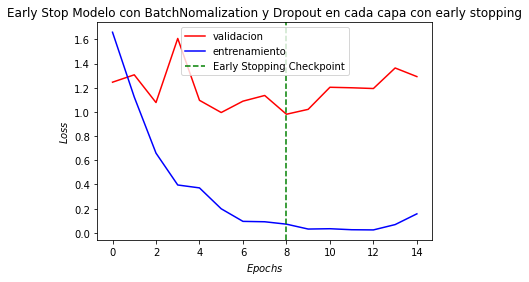

In [39]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.plot( list_loss_validation, '-r', label="validacion")
plt.plot( list_loss_train, '-b', label="entrenamiento")
# find position of lowest validation loss
minposs = list_loss_validation.index(min(list_loss_validation)) 
plt.axvline(minposs, linestyle='--', color='g',label='Early Stopping Checkpoint')

plt.ylabel('$Loss$')
plt.xlabel('$Epochs$')
plt.title('Early Stop Modelo con BatchNomalization y Dropout en cada capa con early stopping')
plt.legend()
plt.show()

### Modelo 3 - sin BatchNorm con Dropout

In [40]:
model         = CNN3(num_classes).to(device)
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(model.parameters(), lr = learning_rate)

print([e.shape for e in model.fc.parameters()])

[torch.Size([4, 20736]), torch.Size([4])]


In [41]:
%%time
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=15)

Epoch [1/15], Step [100/175], Loss: 0.7474
Epoch 1 Training Loss: 0.9727337726524898 Validation Loss: 0.44977346301078797
Epoch [2/15], Step [100/175], Loss: 0.6498
Epoch 2 Training Loss: 0.7992656973430089 Validation Loss: 0.378742036819458
Epoch [3/15], Step [100/175], Loss: 0.7420
Epoch 3 Training Loss: 0.7161998428617204 Validation Loss: 0.34495232403278353
Epoch [4/15], Step [100/175], Loss: 0.2012
Epoch 4 Training Loss: 0.6415422242879868 Validation Loss: 0.29827693283557893
Epoch [5/15], Step [100/175], Loss: 0.7027
Epoch 5 Training Loss: 0.5792901237521852 Validation Loss: 0.2852428752183914
Epoch [6/15], Step [100/175], Loss: 0.1506
Epoch 6 Training Loss: 0.5486133522646768 Validation Loss: 0.2806015759706497
Epoch [7/15], Step [100/175], Loss: 0.3003
Epoch 7 Training Loss: 0.520281907916069 Validation Loss: 0.25472318530082705
Epoch [8/15], Step [100/175], Loss: 0.4845
Epoch 8 Training Loss: 0.4884688215596335 Validation Loss: 0.27910026639699936
Epoch [9/15], Step [100/175],

In [43]:
with torch.no_grad():
    y_true = []
    y_pred = []  
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.float().to(device), labels.float().to(device)           
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        y_true.append(labels.cpu().data.numpy()) 
        y_pred.append(predicted.cpu().data.numpy())  
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'.format(len(test_beta), 100 * correct / total))

Test Accuracy of the model on the 400 test images: 80.75 %


In [44]:
from sklearn.metrics import confusion_matrix
import itertools

confusion_matrix(list(itertools.chain(*y_true)), list(itertools.chain(*y_pred)))

array([[81, 15,  2,  2],
       [11, 81,  8,  0],
       [11, 20, 67,  2],
       [ 4,  1,  1, 94]], dtype=int64)

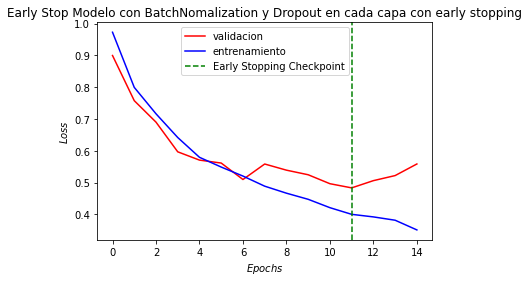

In [45]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.plot( list_loss_validation, '-r', label="validacion")
plt.plot( list_loss_train, '-b', label="entrenamiento")
# find position of lowest validation loss
minposs = list_loss_validation.index(min(list_loss_validation)) 
plt.axvline(minposs, linestyle='--', color='g',label='Early Stopping Checkpoint')

plt.ylabel('$Loss$')
plt.xlabel('$Epochs$')
plt.title('Early Stop Modelo con BatchNomalization y Dropout en cada capa con early stopping')
plt.legend()
plt.show()

### Modelo 4 - con BatchNorm con Dropout en cada capa - item 5

In [46]:
model         = CNN4(num_classes).to(device)
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(model.parameters(), lr = learning_rate)

print([e.shape for e in model.fc.parameters()])

[torch.Size([4, 20736]), torch.Size([4])]


In [47]:
%%time
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=15)

Epoch [1/15], Step [100/175], Loss: 1.1950
Epoch 1 Training Loss: 1.1914620082718985 Validation Loss: 0.5517263984680176
Epoch [2/15], Step [100/175], Loss: 2.1726
Epoch 2 Training Loss: 1.1873315715789794 Validation Loss: 0.6714505159854889
Epoch [3/15], Step [100/175], Loss: 1.0101
Epoch 3 Training Loss: 1.1402802942054613 Validation Loss: 0.5893616503477097
Epoch [4/15], Step [100/175], Loss: 0.8383
Epoch 4 Training Loss: 1.080534415798528 Validation Loss: 0.5419956350326538
Epoch [5/15], Step [100/175], Loss: 1.1608
Epoch 5 Training Loss: 0.9104543250213777 Validation Loss: 0.5401405823230744
Epoch [6/15], Step [100/175], Loss: 1.0223
Epoch 6 Training Loss: 0.9514362976354148 Validation Loss: 0.6519395327568054
Epoch [7/15], Step [100/175], Loss: 1.0816
Epoch 7 Training Loss: 0.9106314568008695 Validation Loss: 0.4535953451693058
Epoch [8/15], Step [100/175], Loss: 1.2914
Epoch 8 Training Loss: 0.765629642520632 Validation Loss: 0.5899171030521393
Epoch [9/15], Step [100/175], Loss

In [48]:
with torch.no_grad():
    y_true = []
    y_pred = []  
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.float().to(device), labels.float().to(device)           
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        y_true.append(labels.cpu().data.numpy()) 
        y_pred.append(predicted.cpu().data.numpy())  
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'.format(len(test_beta), 100 * correct / total))

Test Accuracy of the model on the 400 test images: 79.75 %


In [49]:
from sklearn.metrics import confusion_matrix
import itertools

confusion_matrix(list(itertools.chain(*y_true)), list(itertools.chain(*y_pred)))

array([[84,  9,  6,  1],
       [14, 70, 13,  3],
       [ 9, 19, 71,  1],
       [ 4,  1,  1, 94]], dtype=int64)

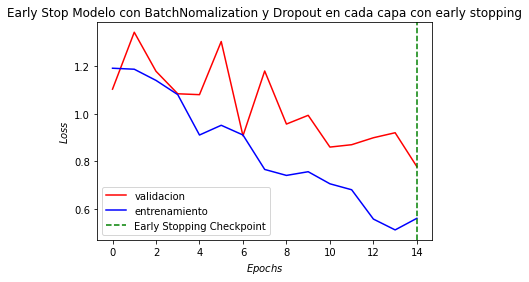

In [50]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.plot( list_loss_validation, '-r', label="validacion")
plt.plot( list_loss_train, '-b', label="entrenamiento")
# find position of lowest validation loss
minposs = list_loss_validation.index(min(list_loss_validation)) 
plt.axvline(minposs, linestyle='--', color='g',label='Early Stopping Checkpoint')

plt.ylabel('$Loss$')
plt.xlabel('$Epochs$')
plt.title('Early Stop Modelo con BatchNomalization y Dropout en cada capa con early stopping')
plt.legend()
plt.show()

### Modelo 5 - con BatchNorm con Dropout solo primera capa item 6

In [51]:
model         = CNN5(num_classes).to(device)
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(model.parameters(), lr = learning_rate)

print([e.shape for e in model.fc.parameters()])

[torch.Size([4, 20736]), torch.Size([4])]


In [52]:
%%time
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=15)

Epoch [1/15], Step [100/175], Loss: 0.7540
Epoch 1 Training Loss: 0.8520295943532671 Validation Loss: 0.30686438620090484
Epoch [2/15], Step [100/175], Loss: 0.6293
Epoch 2 Training Loss: 0.6204213569845473 Validation Loss: 0.28828649878501894
Epoch [3/15], Step [100/175], Loss: 0.7525
Epoch 3 Training Loss: 0.5658842188119888 Validation Loss: 0.2952961450815201
Epoch [4/15], Step [100/175], Loss: 0.5392
Epoch 4 Training Loss: 0.5267783725261688 Validation Loss: 0.3001974987983704
Epoch [5/15], Step [100/175], Loss: 0.6038
Epoch 5 Training Loss: 0.45812202236482075 Validation Loss: 0.2905100250244141
Epoch [6/15], Step [100/175], Loss: 0.4982
Epoch 6 Training Loss: 0.40766027092933654 Validation Loss: 0.2622894829511642
Epoch [7/15], Step [100/175], Loss: 0.2796
Epoch 7 Training Loss: 0.36177977702447345 Validation Loss: 0.2825981975719333
Epoch [8/15], Step [100/175], Loss: 0.3004
Epoch 8 Training Loss: 0.36871435499617033 Validation Loss: 0.2867991814017296
Epoch [9/15], Step [100/17

In [53]:
with torch.no_grad():
    y_true = []
    y_pred = []  
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.float().to(device), labels.float().to(device)           
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        y_true.append(labels.cpu().data.numpy()) 
        y_pred.append(predicted.cpu().data.numpy())  
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'.format(len(test_beta), 100 * correct / total))

Test Accuracy of the model on the 400 test images: 80.5 %


In [54]:
from sklearn.metrics import confusion_matrix
import itertools

confusion_matrix(list(itertools.chain(*y_true)), list(itertools.chain(*y_pred)))

array([[70, 14, 15,  1],
       [ 0, 86, 13,  1],
       [ 5, 23, 71,  1],
       [ 2,  1,  2, 95]], dtype=int64)

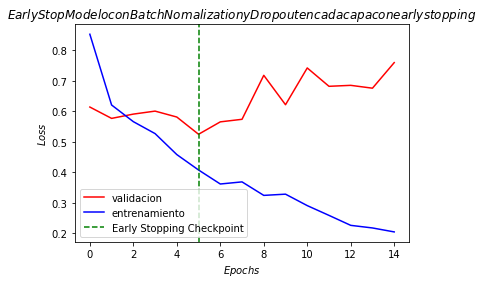

In [55]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.plot( list_loss_validation, '-r', label="validacion")
plt.plot( list_loss_train, '-b', label="entrenamiento")
# find position of lowest validation loss
minposs = list_loss_validation.index(min(list_loss_validation)) 
plt.axvline(minposs, linestyle='--', color='g',label='Early Stopping Checkpoint')

plt.ylabel('$Loss$')
plt.xlabel('$Epochs$')
plt.title('$Early Stop Modelo con BatchNomalization y Dropout en cada capa con early stopping$')
plt.legend()
plt.show()

## 7. Pruebe utilizando EarlyStopping, grafique funcion de perdida

### Early Stopping

In [56]:
model         = CNN3(num_classes).to(device)
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(model.parameters(), lr = learning_rate)

print([e.shape for e in model.fc.parameters()])

[torch.Size([4, 20736]), torch.Size([4])]


In [57]:
%%time
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=15)

Epoch [1/15], Step [100/175], Loss: 0.6882
Epoch 1 Training Loss: 0.9926903215476445 Validation Loss: 0.4064865326881409
Epoch [2/15], Step [100/175], Loss: 1.0026
Epoch 2 Training Loss: 0.8266854199341366 Validation Loss: 0.4098784303665161
Epoch [3/15], Step [100/175], Loss: 0.6893
Epoch 3 Training Loss: 0.7874479254654475 Validation Loss: 0.36509122550487516
Epoch [4/15], Step [100/175], Loss: 0.6509
Epoch 4 Training Loss: 0.7384243638174874 Validation Loss: 0.38767683148384097
Epoch [5/15], Step [100/175], Loss: 0.8126
Epoch 5 Training Loss: 0.7233996782132558 Validation Loss: 0.37009877324104307
Epoch [6/15], Step [100/175], Loss: 0.4721
Epoch 6 Training Loss: 0.6925842209373202 Validation Loss: 0.3706278592348099
Epoch [7/15], Step [100/175], Loss: 1.2160
Epoch 7 Training Loss: 0.662247474874769 Validation Loss: 0.3320874559879303
Epoch [8/15], Step [100/175], Loss: 0.4192
Epoch 8 Training Loss: 0.6418088184935706 Validation Loss: 0.3551059186458588
Epoch [9/15], Step [100/175], 

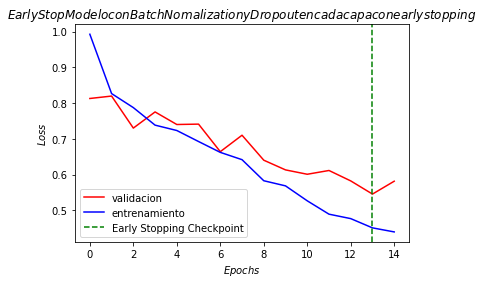

In [58]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.plot( list_loss_validation, '-r', label="validacion")
plt.plot( list_loss_train, '-b', label="entrenamiento")
# find position of lowest validation loss
minposs = list_loss_validation.index(min(list_loss_validation)) 
plt.axvline(minposs, linestyle='--', color='g',label='Early Stopping Checkpoint')

plt.ylabel('$Loss$')
plt.xlabel('$Epochs$')
plt.title('$Early Stop Modelo con BatchNomalization y Dropout en cada capa con early stopping$')
plt.legend()
plt.show()

## 8. 70% para entrenamiento y el resto para testing

In [59]:

#path_Covid = r'C:\Users\ASUS\Desktop\UTEC\Redes Neuronales (CNN)\Clasificador\Dataset 2\COVID' 
#path_Normal = r'C:\Users\ASUS\Desktop\UTEC\Redes Neuronales (CNN)\Clasificador\Dataset 2\Normal'
#path_Lung_Opacity = r'C:\Users\ASUS\Desktop\UTEC\Redes Neuronales (CNN)\Clasificador\Dataset 2\Lung_Opacity'
#path_Viral_Pneumonia = r'C:\Users\ASUS\Desktop\UTEC\Redes Neuronales (CNN)\Clasificador\Dataset 2\Viral Pneumonia'


path_Covid = r'C:\Users\Cracker31\Desktop\JOSE\maestria\UTEC\ciclo2\ai\proyecto3\archive\COVID-19_Radiography_Dataset\COVID' 
path_Normal = r'C:\Users\Cracker31\Desktop\JOSE\maestria\UTEC\ciclo2\ai\proyecto3\archive\COVID-19_Radiography_Dataset\Normal'
path_Lung_Opacity = r'C:\Users\Cracker31\Desktop\JOSE\maestria\UTEC\ciclo2\ai\proyecto3\archive\COVID-19_Radiography_Dataset\Lung_Opacity'
path_Viral_Pneumonia = r'C:\Users\Cracker31\Desktop\JOSE\maestria\UTEC\ciclo2\ai\proyecto3\archive\COVID-19_Radiography_Dataset\Viral Pneumonia'

In [60]:
#### Funcion para leer imagenes dentro de una carpeta
width = 299
height = 299
def imageReading (path,files):
    folderFilesids = os.listdir(path)
    filesRandom = random.sample(folderFilesids, files)
    #folderFilesids = os.listdir(path)
    images = np.zeros((files, height, width))
    for count, n in enumerate(filesRandom):
        if(count == files):
          break
        else:
          path1 = path + '\\' + n
          originalImage = imread(path1)
          if (len(originalImage.shape)==2):
              originalImage = imread(path1)[:,:]
          if (len(originalImage.shape)==3):
              originalImage = imread(path1)[:,:,0]
          #print(originalImage.shape)
          images[count] = originalImage
    imshow(images[0])
    plt.show()
    return images
"""
def imageReading (path):
    folderFilesids = os.listdir(path)
    images = np.zeros((len(folderFilesids), height, width))
    for count, n in enumerate(folderFilesids):
        path1 = path + '\\' + n
        originalImage = imread(path1)
        if (len(originalImage.shape)==2):
            originalImage = imread(path1)[:,:]
        if (len(originalImage.shape)==3):
            originalImage = imread(path1)[:,:,0]
        #print(originalImage.shape)
        images[count] = originalImage
    imshow(images[0])
    plt.show()
    return images
"""

"\ndef imageReading (path):\n    folderFilesids = os.listdir(path)\n    images = np.zeros((len(folderFilesids), height, width))\n    for count, n in enumerate(folderFilesids):\n        path1 = path + '\\' + n\n        originalImage = imread(path1)\n        if (len(originalImage.shape)==2):\n            originalImage = imread(path1)[:,:]\n        if (len(originalImage.shape)==3):\n            originalImage = imread(path1)[:,:,0]\n        #print(originalImage.shape)\n        images[count] = originalImage\n    imshow(images[0])\n    plt.show()\n    return images\n"

C:\Users\Cracker31\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


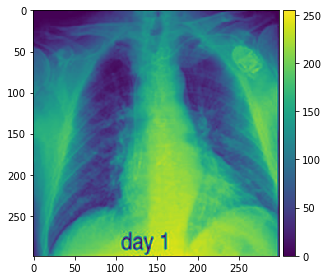

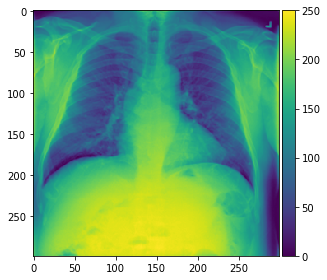

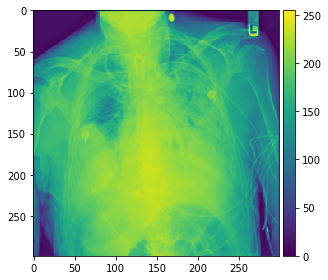

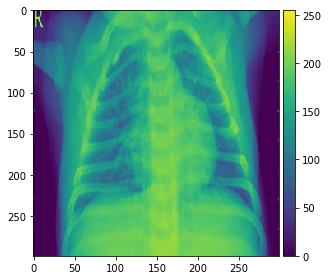

In [61]:
cantintidadImg = 500
covid = imageReading(path_Covid,cantintidadImg)
normal = imageReading(path_Normal,cantintidadImg)
Lung_Opacity = imageReading(path_Lung_Opacity,cantintidadImg)
Viral_Pneumonia = imageReading(path_Viral_Pneumonia,cantintidadImg)

In [62]:
print("covid.shape {} ,normal.shape {} ,Lung_Opacity.shape {} ,Viral_Pneumonia.shape {} ".format(covid.shape,normal.shape,Lung_Opacity.shape,Viral_Pneumonia.shape))

covid.shape (500, 299, 299) ,normal.shape (500, 299, 299) ,Lung_Opacity.shape (500, 299, 299) ,Viral_Pneumonia.shape (500, 299, 299) 


In [63]:
covid = torch.from_numpy(np.array(covid).reshape(-1,1,299,299)) ## torch se convierte nuestra data en tensor - Aumenta la dimension.
normal = torch.from_numpy(np.array(normal).reshape(-1,1,299,299)) # (-1: Cantidad de imagenes, 1: gris o color, 299 x 299: tamaño de la imagen
Lung_Opacity = torch.from_numpy(np.array(Lung_Opacity).reshape(-1,1,299,299))
Viral_Pneumonia = torch.from_numpy(np.array(Viral_Pneumonia).reshape(-1,1,299,299))

In [64]:
covid.shape

torch.Size([500, 1, 299, 299])

In [65]:
covid[0]

tensor([[[  1.,   1.,   1.,  ...,   1.,   1.,   1.],
         [  1.,   1.,   1.,  ...,   1.,   1.,   1.],
         [  1.,   1.,   1.,  ...,   1.,   1.,   1.],
         ...,
         [ 28.,  31.,  35.,  ..., 188., 138.,  49.],
         [ 28.,  31.,  35.,  ..., 189., 138.,  51.],
         [ 28.,  31.,  35.,  ..., 190., 139.,  52.]]], dtype=torch.float64)

### Agregamos las etiquetas y transformamos a tuple

In [66]:
img_covidlist = []
for i in range(covid.shape[0]):
      img_covidlist.append((covid[i]/255.0,0.0))

img_normallist = []
for i in range(normal.shape[0]):
      img_normallist.append((normal[i]/255.0,1.0))
        
img_Lung_Opacitylist = []
for i in range(Lung_Opacity.shape[0]):
      img_Lung_Opacitylist.append((Lung_Opacity[i]/255.0,2.0))
    
img_Viral_Pneumonialist = []
for i in range(Viral_Pneumonia.shape[0]):
      img_Viral_Pneumonialist.append((Viral_Pneumonia[i]/255.0,3.0))

In [67]:
img_normallist[0]

(tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0431, 0.1020, 0.2078],
          [0.0039, 0.0000, 0.0000,  ..., 0.0275, 0.0392, 0.0627],
          [0.0353, 0.0118, 0.0000,  ..., 0.0235, 0.0235, 0.0157],
          ...,
          [0.7412, 0.7059, 0.6706,  ..., 0.1647, 0.2471, 0.3020],
          [0.7373, 0.6980, 0.6706,  ..., 0.1725, 0.2510, 0.3137],
          [0.7373, 0.6980, 0.6706,  ..., 0.1804, 0.2588, 0.3216]]],
        dtype=torch.float64),
 1.0)

In [69]:
import random
random.shuffle(img_covidlist)
covid_train = img_covidlist[0:int(len(img_covidlist)*0.7)]
covid_test = img_covidlist[int(len(img_covidlist)*0.7):]

random.shuffle(img_normallist)
normal_train = img_normallist[0:int(len(img_normallist)*0.7)]
normal_test = img_normallist[int(len(img_normallist)*0.7):]

random.shuffle(img_Lung_Opacitylist)
Lung_Opacitylist_train = img_Lung_Opacitylist[0:int(len(img_Lung_Opacitylist)*0.7)]
Lung_Opacitylist_test = img_Lung_Opacitylist[int(len(img_Lung_Opacitylist)*0.7):]

random.shuffle(img_Viral_Pneumonialist)
Viral_Pneumonialist_train = img_Viral_Pneumonialist[0:int(len(img_Viral_Pneumonialist)*0.7)]
Viral_Pneumonialist_test = img_Viral_Pneumonialist[int(len(img_Viral_Pneumonialist)*0.7):]

### COVID - NORMAL - LUNG OPACITY - VIRAL PNEUMONIALIST

In [70]:
print("El tamaño de la muestra COVID del training es {} y del test es {}"\
      .format(len(covid_train),len(covid_test)))
print("El tamaño de la muestra NORMAL del training es {}, y del test es {}"\
      .format(len(normal_train),len(normal_test)))
print("El tamaño de la muestra LUNG_OPACITY del training es {}, y del test es {}"\
      .format(len(Lung_Opacitylist_train),len(Lung_Opacitylist_test)))
print("El tamaño de la muestra VIRAL PNEUMONIA del training es {}, y del test es {}"\
      .format(len(Viral_Pneumonialist_train),len(Viral_Pneumonialist_test)))

El tamaño de la muestra COVID del training es 350 y del test es 150
El tamaño de la muestra NORMAL del training es 350, y del test es 150
El tamaño de la muestra LUNG_OPACITY del training es 350, y del test es 150
El tamaño de la muestra VIRAL PNEUMONIA del training es 350, y del test es 150


### Unir Train de Covid y Normal y Test de Covid y Normal 

In [71]:
batch_size = 16
train_loader = torch.utils.data.DataLoader(dataset=train_beta, batch_size=batch_size, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_beta, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_beta, batch_size=batch_size, shuffle=True)

### Modelo 3 - sin BatchNorm con Dropout

In [72]:
torch.manual_seed(22)
#hyperparameter 
num_classes = 4
learning_rate =  0.001
num_epochs = 20

class CNN3(nn.Module):
    def __init__(self, num_classes=4):
        super(CNN3, self).__init__()
        #input 299x299
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=4, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2,padding=0),
            nn.Dropout(p=0.5)) #150 x 150
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=0),  #146
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.2))  #73x73
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=0),  #36
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.7))
        
        self.fc = nn.Linear(18*18*64, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        #print('aviso1')
        out = self.layer2(out)
        #print('aviso2')
        out = self.layer3(out)
        #print('aviso3')
        out = out.reshape(out.size(0), -1)
        #print('aviso4')
        out = self.fc(out)
        return out


In [73]:
model         = CNN1(num_classes).to(device)
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(model.parameters(), lr = learning_rate)

print([e.shape for e in model.fc.parameters()])

[torch.Size([4, 20736]), torch.Size([4])]


In [74]:
def train(model, optimizer, loos_fn, num_epochs):
    loss_vals = []
    running_loss =0.0
    # train the model
    total_step = len(train_loader)  # el train loader es el motor que se encarga de sacar las imagenes del train_set

    list_loss_train= []
    list_loss_validation = []
    list_time = []
    j=0
    
    best_loss = 0
    
    # Train the model
    for epoch in range(num_epochs):
        train_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images = images.float().to(device)
            labels = labels.long().to(device)
            # forward 
            output = model(images).float()
            #Calucla el loss
            loss   = loss_fn(output, labels)
            # change the params
            # Clear the gradients of all optimized variables
            optimizer.zero_grad()
            # Backward 
            loss.backward()
            #parametros update
            optimizer.step()
            train_loss +=loss.item()
            list_time.append(j)
            j+=1

            if (i+1) % 100 == 0:
                  print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                        .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
                    
        list_loss_train.append(train_loss / len(train_loader))
        
        #validation of the model
        valid_loss =0.0   
        for i, (images, labels) in enumerate(test_loader):
            images = images.float().to(device)
            labels = labels.long().to(device)
            
            # Forward Pass
            output = model(images).float()
            # Find the Loss
            loss   = loss_fn(output, labels)
            # Calculate loss
            valid_loss +=loss.item()
        #Save loss in a List
        
        list_loss_validation.append(valid_loss / len(test_loader))
        ###Early stopping###
        if valid_loss > best_loss:
            best_loss = valid_loss
            # At this point also save a snapshot of the current model
            torch.save(model, 'my_model_best_loss.pth')
        
        print(f'Epoch {epoch+1} Training Loss: {train_loss / len(train_loader)} Validation Loss: {valid_loss / len(validation_loader)}')  
    
    print('Finished Training Trainset')
    return list_loss_train,list_loss_validation, best_loss, model

In [75]:
%%time
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=15)

Epoch [1/15], Step [100/175], Loss: 0.7760
Epoch 1 Training Loss: 0.9385423253263746 Validation Loss: 0.42159801959991455
Epoch [2/15], Step [100/175], Loss: 0.8048
Epoch 2 Training Loss: 0.7261878059591566 Validation Loss: 0.3496621650457382
Epoch [3/15], Step [100/175], Loss: 1.1173
Epoch 3 Training Loss: 0.6396667027473449 Validation Loss: 0.3385868829488754
Epoch [4/15], Step [100/175], Loss: 0.6556
Epoch 4 Training Loss: 0.5790402909687588 Validation Loss: 0.27342716097831726
Epoch [5/15], Step [100/175], Loss: 0.6600
Epoch 5 Training Loss: 0.49675194697720665 Validation Loss: 0.2592481911182404
Epoch [6/15], Step [100/175], Loss: 0.3306
Epoch 6 Training Loss: 0.4450754333393914 Validation Loss: 0.24231312334537505
Epoch [7/15], Step [100/175], Loss: 0.2391
Epoch 7 Training Loss: 0.3763877642580441 Validation Loss: 0.2667999854683876
Epoch [8/15], Step [100/175], Loss: 0.6353
Epoch 8 Training Loss: 0.3362045051796096 Validation Loss: 0.27593607127666475
Epoch [9/15], Step [100/175

In [76]:
with torch.no_grad():
    y_true = []
    y_pred = []  
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.float().to(device), labels.float().to(device)           
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        y_true.append(labels.cpu().data.numpy()) 
        y_pred.append(predicted.cpu().data.numpy())  
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'.format(len(test_beta), 100 * correct / total))

Test Accuracy of the model on the 400 test images: 79.25 %


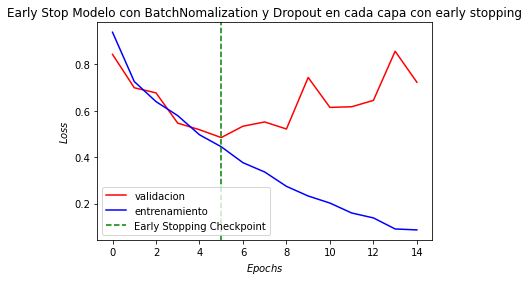

In [77]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.plot( list_loss_validation, '-r', label="validacion")
plt.plot( list_loss_train, '-b', label="entrenamiento")
# find position of lowest validation loss
minposs = list_loss_validation.index(min(list_loss_validation)) 
plt.axvline(minposs, linestyle='--', color='g',label='Early Stopping Checkpoint')

plt.ylabel('$Loss$')
plt.xlabel('$Epochs$')
plt.title('Early Stop Modelo con BatchNomalization y Dropout en cada capa con early stopping')
plt.legend()
plt.show()

In [78]:
from sklearn.metrics import confusion_matrix
import itertools

confusion_matrix(list(itertools.chain(*y_true)), list(itertools.chain(*y_pred)))

array([[84,  5,  9,  2],
       [10, 59, 28,  3],
       [ 9,  9, 79,  3],
       [ 3,  1,  1, 95]], dtype=int64)

In [79]:
%%time
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=4)

Epoch [1/4], Step [100/175], Loss: 0.0717
Epoch 1 Training Loss: 0.05579476229314293 Validation Loss: 0.43780079275369643
Epoch [2/4], Step [100/175], Loss: 0.0671
Epoch 2 Training Loss: 0.0733579626253673 Validation Loss: 0.4358841128647327
Epoch [3/4], Step [100/175], Loss: 0.0108
Epoch 3 Training Loss: 0.08518315382268546 Validation Loss: 0.5265007211267948
Epoch [4/4], Step [100/175], Loss: 0.0127
Epoch 4 Training Loss: 0.03371519918620054 Validation Loss: 0.48028990991413595
Finished Training Trainset
Wall time: 9min 22s


In [80]:

%%time
# Clear the gradients of all optimized variables
optimizer.zero_grad()
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=2)

Epoch [1/2], Step [100/175], Loss: 0.0408
Epoch 1 Training Loss: 0.037820823467378174 Validation Loss: 0.4791604452580214
Epoch [2/2], Step [100/175], Loss: 0.0116
Epoch 2 Training Loss: 0.03436586844851263 Validation Loss: 0.5710038036108017
Finished Training Trainset
Wall time: 4min 43s


In [81]:
from sklearn.metrics import confusion_matrix
import itertools

confusion_matrix(list(itertools.chain(*y_true)), list(itertools.chain(*y_pred)))

array([[84,  5,  9,  2],
       [10, 59, 28,  3],
       [ 9,  9, 79,  3],
       [ 3,  1,  1, 95]], dtype=int64)

In [82]:
with torch.no_grad():
    y_true = []
    y_pred = []  
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.float().to(device), labels.float().to(device)           
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        y_true.append(labels.cpu().data.numpy()) 
        y_pred.append(predicted.cpu().data.numpy())  
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'.format(len(test_beta), 100 * correct / total))

Test Accuracy of the model on the 400 test images: 79.75 %
